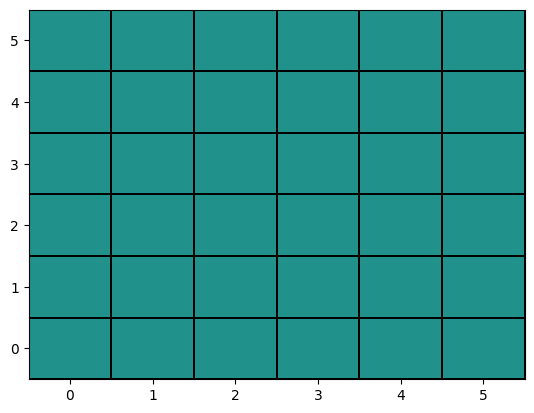

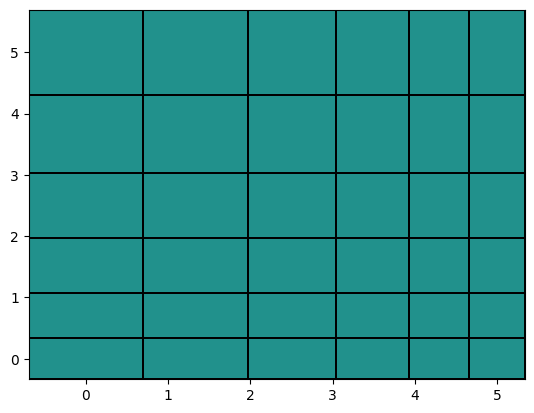

'\n    With two different matricies now I can send space matrix outputs to compt.domn Jacobi calculations. The\n    jacobi can be calcualted inside of the class. The jacobi of the new computational domain will be saved in \n    side the class itself. I will think how to ose Jacobi afterwards\n'

In [1]:
#%matplotlib notebook
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
import numpy as np
from Domain import Mesh
from Domain import PDE_2D_Solver
from Differentials import *


x, y = sy.symbols('x y')

Ux = 1
qs = 1

N = 20
# Define the potensial function
phi = Ux*x + qs/(2*np.pi)*sy.log(x**2 + y**2)  #Potensial should be found by gridding. 

# Define the velocity components
u = sy.diff(phi, x)
v = sy.diff(phi, y)

u_fun = sy.lambdify([x,y], u)
v_fun = sy.lambdify([x,y], v)

# Mesh Properties 
x_list = np.linspace(-1, 1, N)
y_list = np.linspace(-1, 1, N)

X, Y = np.meshgrid(x_list, y_list)

u_num = u_fun(X,Y)
v_num = v_fun(X,Y)

z = X * np.exp(-X/2 - Y**2)
dx, dy = np.gradient(z)
n = -2
color = np.sqrt(((dx-n)/2)*2 + ((dy-n)/2)*2)

# print(phi)
# print(u)
# print(u_fun)
# print(u_fun(x_list,y_list))
# print(X)

# plt.figure(1)
# plt.quiver(X, Y, u_num, v_num, color)
# plt.streamplot(X, Y, u_num, v_num, density=[1, 0.4])
# plt.streamplot(X, Y, u_num, v_num, color=v_num, linewidth=2, cmap='autumn')
# plt.show()

# fig, mesh_ax = plt.subplots()

# plt.

# mesh_ax.pcolormesh(X,Y,np.zeros((N,N)),vmin=-0.5, vmax=1.0, edgecolors="black")

# plt.show()


block_coordinates = [(0,0),(0,5),(5,5),(5,0)]
# print(list(block_coordinates[3]))
node_numbers = [6, 6]

space = Mesh(block_coordinates, node_numbers) #it seems like a one block. Build more sopisticated block type structures
# space.nonuniform_block_mesh_2D(-1.2, -1.4)
# space.nonuniform_mesh_2D(-1.2, -1.4)
a, b = space.nonuniform_block_mesh_2D(-1.2, 1.2)

# print(space.matricies[0])
# print(space.matricies[1])

BCs = {'W': 'N', 'S': 'D', 'E': 'D', 'N': 'N'}
BCs_values = {'W': 1, 'S': 0.5, 'E': -0.2, 'N': 0}

# solution = PDE_2D_Solver(space,BCs)
# solution.solver(BCs_values)
# solution.velocityfield()
# solution.plot2D()
# solution.stream()
# solution.countour()

compt_dom = Mesh(block_coordinates, node_numbers)
compt_dom.uniform_block_mesh_2D()
compt_dom.plot2D()
space.plot2D()
compt_dom.Jacobi(a, b)
print(compt_dom.Jacobian)

# print(OneDcentraldiff(compt_dom.matricies[0], a))
# print(OneDcentraldiff(compt_dom.matricies[0], b, axis=1))
# print(OneDcentraldiff(compt_dom.matricies[1], a))
# print(OneDcentraldiff(compt_dom.matricies[1], -b, axis=1))
# compt_dom.matricies[1] 


"""
    With two different matricies now I can send space matrix outputs to compt.domn Jacobi calculations. The
    jacobi can be calcualted inside of the class. The jacobi of the new computational domain will be saved in 
    side the class itself. I will think how to ose Jacobi afterwards
"""

